<center>
<img src="logo.png" height="900"> 
</center>


# Много гипотез

В этом домашнем задании мы будем проверять гипотезы. Всего в этой лабораторной работе $7$ задач. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Задание 1 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [16]:
df = pd.read_csv('./data/df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

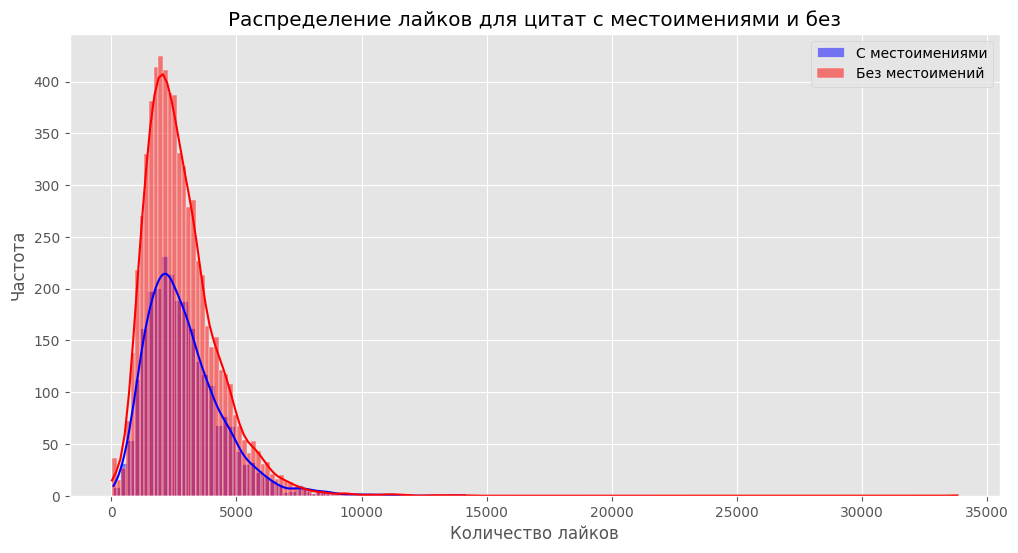

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['I'] == True], x='likes', color='blue', label='С местоимениями', kde=True)
sns.histplot(data=df[df['I'] == False], x='likes', color='red', label='Без местоимений', kde=True)
plt.title('Распределение лайков для цитат с местоимениями и без')
plt.xlabel('Количество лайков')
plt.ylabel('Частота')
plt.legend()
plt.show()

Хвосты, конечно же

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [ ]:

median_with = df[df['I'] == True]['likes'].median()
median_without = df[df['I'] == False]['likes'].median()
mean_with = df[df['I'] == True]['likes'].mean()
mean_without = df[df['I'] == False]['likes'].mean()

print(f'Медиана лайков (с местоимениями): {median_with}')
print(f'Медиана лайков (без местоимений): {median_without}')
print(f'Среднее лайков (с местоимениями): {mean_with}')
print(f'Среднее лайков (без местоимений): {mean_without}')

Медиана лайков (с местоимениями): 2588.5
Медиана лайков (без местоимений): 2497.0
Среднее лайков (с местоимениями): 2879.1828885400314
Среднее лайков (без местоимений): 2784.0432051478474


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [ ]:
from statsmodels.stats.weightstats import ztest


sample_with = df[df['I'] == True]['likes']
sample_without = df[df['I'] == False]['likes']


alpha = 0.05
z_obs, pval = ztest(sample_with, sample_without, value=0, alternative='two-sided', ddof=1)

print(f'Наблюдаемое значение статистики: {z_obs}')
print(f'P-значение: {pval}')

Наблюдаемое значение статистики: 2.684387800858848
P-значение: 0.00726627678608575


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [ ]:

z_crit = sts.norm.ppf(1 - alpha/2)

print(f'Критическое значение: {z_crit}')


if abs(z_obs) > z_crit:
    print('Отвергаем нулевую гипотезу: средние различаются')
else:
    print('Не отвергаем нулевую гипотезу: средние не различаются')

Критическое значение: 1.959963984540054
Отвергаем нулевую гипотезу: средние различаются


In [ ]:

assert np.abs(z_obs - 2.684387800858848) < 1e-5




Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Задание 2  (Тайлер) 

__Люди всё время меня спрашивают, знаю ли я Тайлера Дёрдена?__ Да, знаю. Он делает лучшее мыло в стране. 

__а)__ Тайлер считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Тайлер летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак? 

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

In [ ]:
from scipy import stats as sts


n = 10               
s2 = 27              
sigma2_0 = 25        
alpha = 0.01         


chi_obs = (n - 1) * s2 / sigma2_0


pval1 = 1 - sts.chi2.cdf(chi_obs, df=n-1)

print(f"Наблюдаемое значение хи-квадрат: {chi_obs:.2f}")
print(f"P-значение: {pval1:.4f}")


chi_crit = sts.chi2.ppf(1 - alpha, df=n-1)

print(f"Критическое значение: {chi_crit:.2f}")


if chi_obs > chi_crit:
    print("Отвергаем H0: дисперсия превышает 25 г², партию надо списать")
else:
    print("Не отвергаем H0: дисперсия в пределах нормы, можно продавать")

Наблюдаемое значение хи-квадрат: 9.72
P-значение: 0.3736
Критическое значение: 21.67
Не отвергаем H0: дисперсия в пределах нормы, можно продавать


__б)__ Для того, чтобы уменьшить количество бракованного мыла, Тайлер собирается внедрить новую технологию производства. Тайлер произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

In [ ]:

n_old = n_new = 100   
s_old = 6             
s_new = 5             
alpha = 0.01

s2_old = s_old ** 2
s2_new = s_new ** 2

F_obs = s2_old / s2_new

pval2 = 1 - sts.f.cdf(F_obs, dfn=n_old-1, dfd=n_new-1)

print(f"\nF-статистика: {F_obs:.2f}")
print(f"P-значение: {pval2:.4f}")

F_crit = sts.f.ppf(1 - alpha, dfn=n_old-1, dfd=n_new-1)

print(f"Критическое значение F: {F_crit:.2f}")


if F_obs > F_crit:
    print("Отвергаем H0: новая технология имеет меньшую дисперсию, стоит внедрить")
else:
    print("Не отвергаем H0: нет доказательств преимущества новой технологии")


F-статистика: 1.44
P-значение: 0.0356
Критическое значение F: 1.60
Не отвергаем H0: нет доказательств преимущества новой технологии


In [30]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1

# другие подобные тесты скрыты от вас

## Задание 3 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [32]:
import pandas as pd
import numpy as np
from scipy import stats as sts

df = pd.read_csv('./data/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [ ]:

df_melted = df.melt(id_vars='year', 
                   value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                   var_name='quarter', 
                   value_name='approval')


df_clean = df_melted.dropna()


df_clean['period'] = df_clean['year'].astype(str) + df_clean['quarter'].str.replace('Qtr', 'Q')

nixon_data = df_clean.copy()  

df_filtered = df_clean[(df_clean['period'] >= '1969Q1') & (df_clean['period'] <= '1972Q2')]

x = df_clean[(df_clean['period'] >= '1969Q1') & (df_clean['period'] <= '1972Q2')]['approval']
y = df_clean[(df_clean['period'] >= '1972Q3') & (df_clean['period'] <= '1974Q2')]['approval']

C:\Users\ilyaf\AppData\Local\Temp\ipykernel_25384\1684880519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['period'] = df_clean['year'].astype(str) + df_clean['quarter'].str.replace('Qtr', 'Q')


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [ ]:

obs, pval = sts.ttest_ind(x, y, equal_var=True)

print("Анализ изменения рейтинга президента:")
print(f"Период 1 (до): {len(x)} точек данных, среднее = {x.mean():.2f}")
print(f"Период 2 (после): {len(y)} точек данных, среднее = {y.mean():.2f}")
print(f"\nt-статистика: {obs:.4f}")
print(f"p-value: {pval:.6f}")


alpha = 0.05
if pval < alpha:
    print("\nВывод: Отвергаем нулевую гипотезу - рейтинг значимо изменился")
else:
    print("\nВывод: Не отвергаем нулевую гипотезу - нет доказательств изменения рейтинга")

Анализ изменения рейтинга президента:
Период 1 (до): 14 точек данных, среднее = 56.36
Период 2 (после): 6 точек данных, среднее = 38.67

t-статистика: 3.5641
p-value: 0.002217

Вывод: Отвергаем нулевую гипотезу - рейтинг значимо изменился


In [46]:
# проверка того, что задание решено верно

# другие подобные тесты скрыты от вас 
assert np.abs(obs - 3.5640741313229793) < 1e-5


## Задание 4 (сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [47]:
df = pd.read_csv('./data/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [51]:
from scipy import stats
extra_before = df[df["group"] == 1]["extra"]
tobs1, pval1 = stats.ttest_1samp(extra_before, popmean=0)
pval1

0.2175977800684489

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

In [ ]:

before = df[df["group"] == 1]["extra"].reset_index(drop=True)
after = df[df["group"] == 2]["extra"].reset_index(drop=True)


tobs2, pval_two_sided = stats.ttest_rel(after, before)


if tobs2 > 0:
    pval2 = pval_two_sided / 2
else:
    pval2 = 1 - pval_two_sided / 2

pval2

0.001416445098692135

In [53]:
# проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

# другие подобные тесты скрыты от вас 

## Задание 5 (say my name)

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей. 

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`. 

In [71]:
df = pd.read_csv('./data/cats_names.csv', sep='\t')
df.head()

,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры: 

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль. 
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы. 

In [ ]:

noun4 = ((df['stimuli'] == 'Noun 4') & (df['Total Score'] > 0)).astype(int)
name = ((df['stimuli'] == "Test Cat's Name") & (df['Total Score'] > 0)).astype(int)


b = ((noun4 == 0) & (name == 1)).sum()  
c = ((noun4 == 1) & (name == 0)).sum()  


z_obs = (abs(b - c) - 1) / np.sqrt(b + c)
pval = 2 * (1 - stats.norm.cdf(abs(z_obs)))  

In [87]:
# проверка того, что задание решено верно
assert sum(name) == 14
assert np.abs(z_obs - 1.7888543819998317) < 1e-5

# другие подобные тесты скрыты от вас 

AssertionError: 

Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента. О том, как это можно делать, мы с вами поговорим в будущем. 

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Задание 6

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета. 

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы. 

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/matan.csv', sep='\t')
df.head()

,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


In [ ]:
from statsmodels.stats.proportion import proportions_ztest


angry_failures = ((df['is_angry'] == 1) & (df['target_1'] == 0)).sum()
angry_total = (df['is_angry'] == 1).sum()

kind_failures = ((df['is_angry'] == 0) & (df['target_1'] == 0)).sum()
kind_total = (df['is_angry'] == 0).sum()


count = np.array([angry_failures, kind_failures])
nobs = np.array([angry_total, kind_total])
z_obs, pval = proportions_ztest(count, nobs, alternative='larger')

In [18]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 0.29897)  < 1e-5

# другие подобные тесты скрыты от вас 

AssertionError: 

## Задание 7

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение. 

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя. А ещё [прочитайте историю](https://absentis.livejournal.com/27153.html) про то, почему Коперник мазал бутеры маслом. 

In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats  


n = 200  
m = 105  


count = np.array([m])
nobs = np.array([n])
z_obs, pval = proportions_ztest(count, nobs, value=0.5, alternative='two-sided')


In [ ]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 0.70799) < 1e-5

# другие подобные тесты скрыты от вас 